In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy import stats

# Look at daily and hourly data

In [2]:
scaler = MinMaxScaler()

df_hourly = pd.read_csv('data/hourly.csv')

# REMOVE OUTLIERS
numerical_cols = df_hourly.select_dtypes(include=[np.number])
df_hourly = df_hourly[(np.abs(stats.zscore(numerical_cols)) < 4.0).all(axis=1)]

dfh_scaled = pd.DataFrame(scaler.fit_transform(numerical_cols), 
                         columns=numerical_cols.columns)

df_hourly['date'] = pd.to_datetime(df_hourly['date'])
dfh_scaled['date'] = pd.to_datetime(df_hourly['date'])
df_hourly['year'] = df_hourly['date'].dt.year
df_hourly['month'] = df_hourly['date'].dt.month
df_hourly['day'] = df_hourly['date'].dt.dayofyear



df_hourly.describe()

,date,CFS,TOBS_origValue,TOBS_value,WTEQ_origValue,WTEQ_value,year,month,day
count,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfh_scaled.describe()

,CFS,TOBS_origValue,TOBS_value,WTEQ_origValue,WTEQ_value,date
count,260415.000000,160882.000000,160882.000000,162297.000000,162297.000000,0
mean,0.074894,0.015817,0.596983,0.009117,0.008622,NaT
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaT
25%,0.018532,0.013897,0.512698,0.003061,0.002562,NaT
50%,0.030054,0.015711,0.592857,0.008120,0.007625,NaT
75%,0.065583,0.017614,0.676984,0.013492,0.012999,NaT
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaT
std,0.110785,0.004505,0.126967,0.007032,0.007035,NaN


In [4]:
scaler = MinMaxScaler()
df_daily = pd.read_csv('data/daily.csv')

numerical_cols = df_daily.select_dtypes(include=[np.number])
dfd_scaled = pd.DataFrame(scaler.fit_transform(numerical_cols), 
                         columns=numerical_cols.columns)

df_daily['date'] = pd.to_datetime(df_daily['date'])
dfd_scaled['date'] = pd.to_datetime(df_daily['date'])
df_daily['year'] = df_daily['date'].dt.year
df_daily['month'] = df_daily['date'].dt.month
df_daily['day'] = df_daily['date'].dt.dayofyear

df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12585 entries, 0 to 12584
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            12585 non-null  datetime64[ns]
 1   TAVG_flag       12344 non-null  object        
 2   TAVG_origFlag   12344 non-null  object        
 3   TAVG_origValue  12344 non-null  float64       
 4   TAVG_value      12343 non-null  float64       
 5   WTEQ_average    12584 non-null  float64       
 6   WTEQ_flag       12584 non-null  object        
 7   WTEQ_origFlag   12584 non-null  object        
 8   WTEQ_origValue  12584 non-null  float64       
 9   WTEQ_value      12584 non-null  float64       
 10  agency_cd       12584 non-null  object        
 11  site_no         12584 non-null  float64       
 12  CFS             12584 non-null  float64       
 13  status          12584 non-null  object        
 14  year            12585 non-null  int32         
 15  mo

In [5]:
dfd_scaled.describe()

,TAVG_origValue,TAVG_value,WTEQ_average,WTEQ_origValue,WTEQ_value,site_no,CFS,date
count,12344.000000,12343.000000,12584.000000,12584.000000,12584.000000,12584.0,12584.000000,12585
mean,0.678290,0.678363,0.373659,0.315756,0.237387,0.0,0.080910,2007-03-25 00:00:00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1990-01-01 00:00:00
25%,0.580306,0.580306,0.022901,0.105495,0.000000,0.0,0.019401,1998-08-13 00:00:00
50%,0.675908,0.675908,0.316794,0.274725,0.191176,0.0,0.031890,2007-03-25 00:00:00
75%,0.784895,0.784895,0.664122,0.468132,0.406863,0.0,0.072147,2015-11-04 00:00:00
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2024-06-15 00:00:00
std,0.140011,0.140051,0.338007,0.209718,0.233733,0.0,0.119481,NaN


<Axes: xlabel='date', ylabel='CFS'>

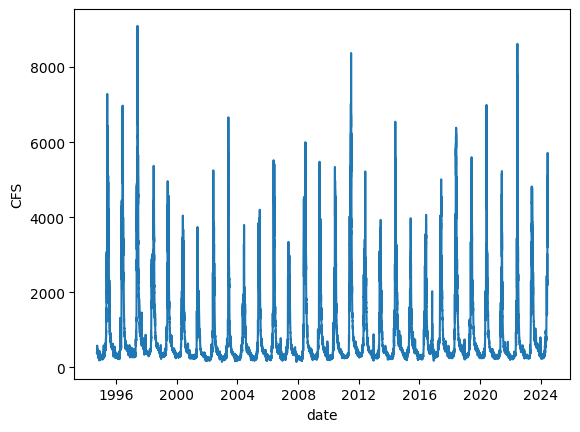

In [96]:
sb.lineplot(data=df_hourly, x='date', y='CFS')

<Axes: xlabel='date', ylabel='CFS'>

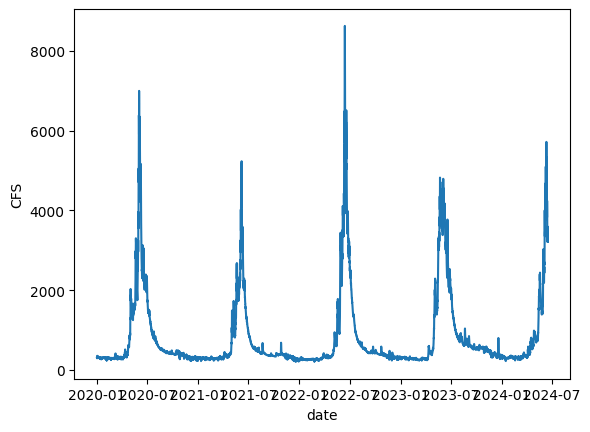

In [97]:
sb.lineplot(data=(df_hourly[df_hourly['date'] >= '2020-01-01 00:00']), x='date', y='CFS')

<Axes: xlabel='date', ylabel='CFS'>

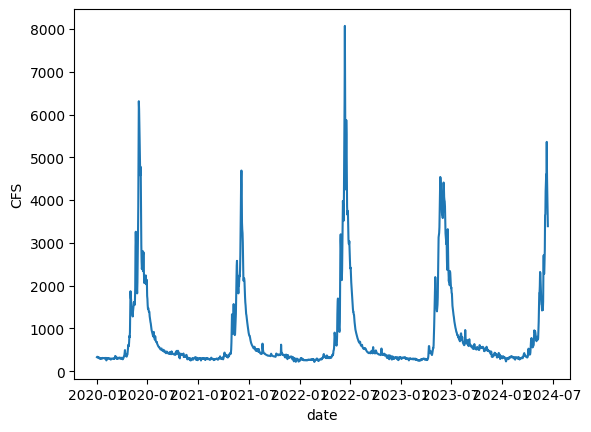

In [35]:
sb.lineplot(data=df_daily[df_daily['date'] >= '2020-01-01'], x='date', y='CFS')

<Axes: xlabel='day', ylabel='CFS'>

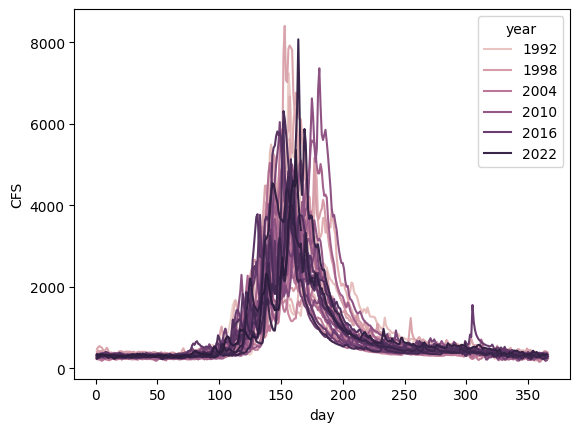

In [36]:
sb.lineplot(data=df_daily, x='day', y='CFS', hue='year')

<Axes: xlabel='day', ylabel='CFS'>

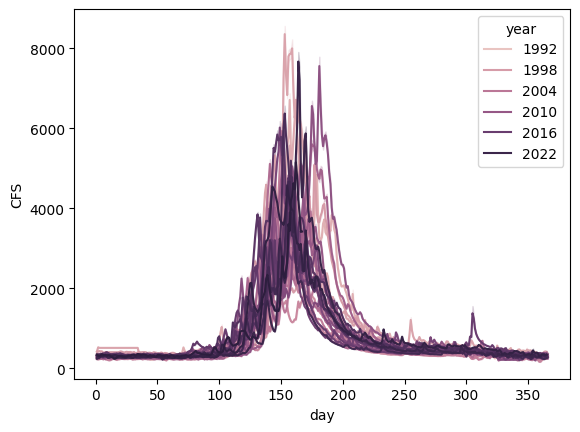

In [37]:
sb.lineplot(data=df_hourly, x='day', y='CFS', hue='year')

<Axes: xlabel='day', ylabel='CFS'>

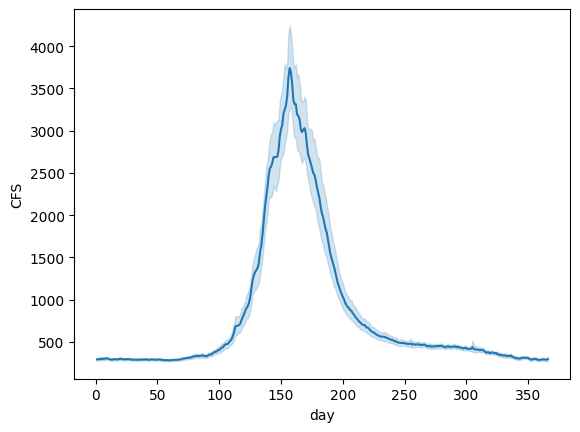

In [39]:
sb.lineplot(data=df_daily, x='day', y='CFS')

<Axes: xlabel='day', ylabel='CFS'>

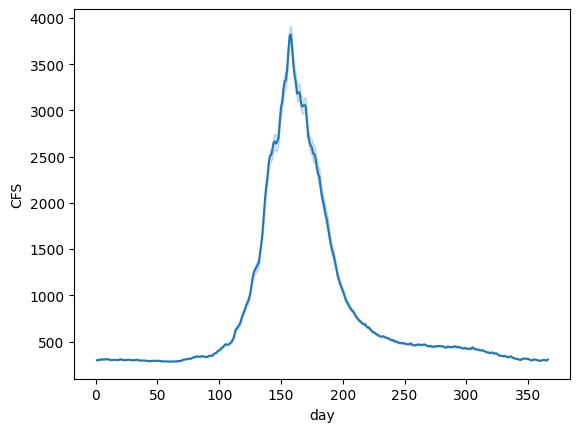

In [40]:
sb.lineplot(data=df_hourly, x='day', y='CFS')

## Look at covariates for hourly and daily data

<Axes: xlabel='date', ylabel='values'>

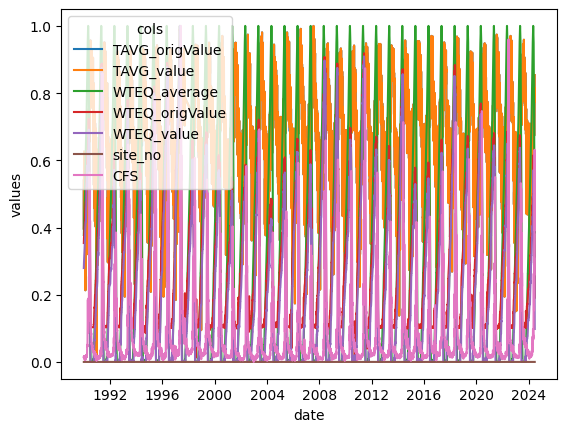

In [152]:
sb.lineplot(data=dfd_scaled.melt('date', var_name='cols', value_name='values'), 
            x='date', 
            y='values',
            hue='cols'
            )

<Axes: xlabel='date', ylabel='values'>

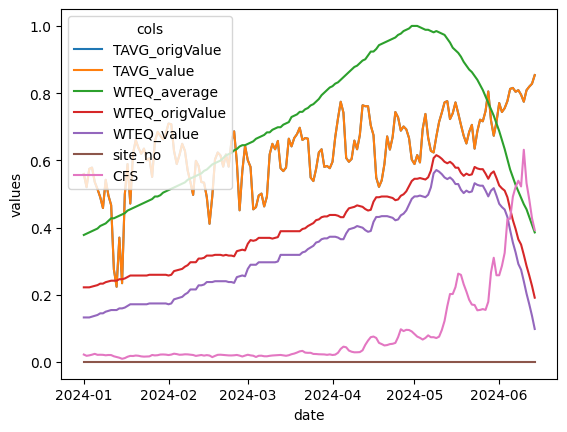

In [153]:
sb.lineplot(data=dfd_scaled[dfd_scaled['date'] >= '2024-01-01'].melt('date', var_name='cols', value_name='values'), 
            x='date', 
            y='values',
            hue='cols'
            )

<Axes: xlabel='date', ylabel='values'>

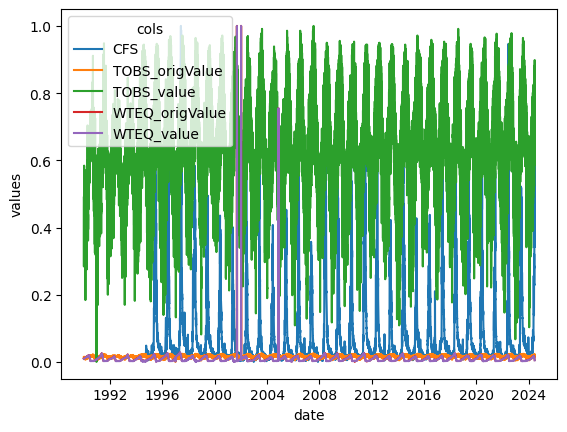

In [154]:
sb.lineplot(data=dfh_scaled.melt('date', var_name='cols', value_name='values'), 
            x='date', 
            y='values',
            hue='cols'
            )

<Axes: xlabel='date', ylabel='values'>

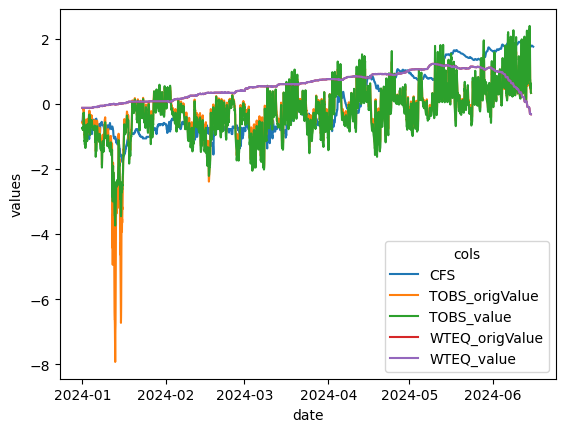

In [108]:
sb.lineplot(data=dfh_scaled[dfh_scaled['date'].dt.year >= 2024].melt('date', var_name='cols', value_name='values'), 
            x='date', 
            y='values',
            hue='cols'
            )

<Axes: xlabel='date', ylabel='values'>

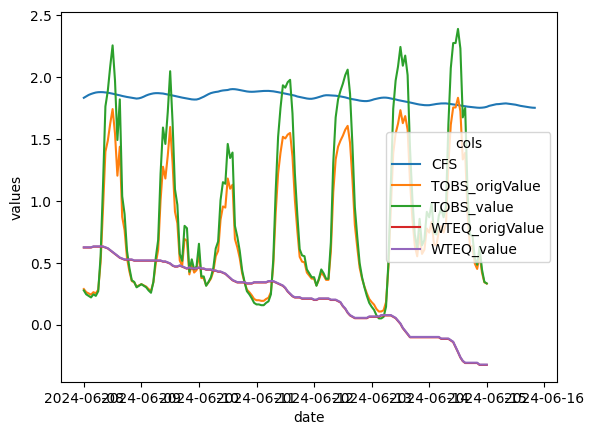

In [111]:
sb.lineplot(data=dfh_scaled[dfh_scaled['date'] >= '2024-06-08'].melt('date', var_name='cols', value_name='values'), 
            x='date', 
            y='values',
            hue='cols'
            )

# TODO! Drop outliers for hourly data
I scaled it using a power scaler but should just drop the wack values.